# Why software projects take longer than you think – a statistical model

https://erikbern.com/2019/04/15/why-software-projects-take-longer-than-you-think-a-statistical-model.html

In [107]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from IPython.display import HTML, Image, Video

In [58]:
ds = pd.read_csv("data.csv")
ds.head()

,TaskNumber,Summary,Priority,RaisedByID,AssignedToID,AuthorisedByID,StatusCode,ProjectCode,ProjectBreakdownCode,Category,SubCategory,HoursEstimate,HoursActual,DeveloperID,DeveloperHoursActual,TaskPerformance,DeveloperPerformance
0,1735,Flag RI on SCM Message Summary screen using me...,1,58,58,6.0,FINISHED,PC2,PBC42,Development,Enhancement,14.0,1.75,58,1.75,12.25,12.25
1,1742,Allow RI Policies to be marked as Exhausted,1,58,42,6.0,FINISHED,PC2,PBC21,Development,Enhancement,7.0,7.00,42,7.00,0.00,0.00
2,1971,Fix Invalid UWREF Line DX402L99A1N,2,7,58,6.0,FINISHED,PC2,PBC75,Operational,In House Support,0.7,0.70,58,0.70,0.00,0.00
3,2134,New rows in the diary event for the SCM are re...,5,50,42,6.0,FINISHED,PC2,PBC42,Development,Bug,0.7,0.70,42,0.70,0.00,0.00
4,2251,Application Screen Size - Need to set Min Size...,10,46,13,6.0,FINISHED,PC2,PBC21,Development,Bug,3.5,3.50,13,3.50,0.00,0.00


1.804101062130962 6.5382443864599615 29.289962373392484 1091.1800353010233


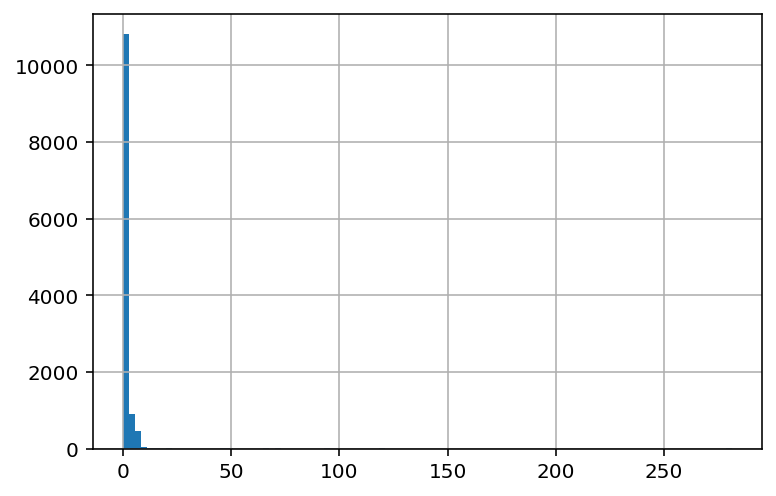

In [115]:
actual_estimated_ratio = ds.HoursActual / ds.HoursEstimate
actual_estimated_ratio.hist(bins=100)

median = np.median(actual_estimated_ratio)
mean = np.mean(actual_estimated_ratio)
std = np.std(actual_estimated_ratio)
skew = stats.skew(actual_estimated_ratio)
kurtosis = stats.kurtosis(actual_estimated_ratio)
print(mean, std, skew, kurtosis)

In [109]:
HTML("The average programming task takes <strong>%.02f</strong> many times more than estimated" % mean)

In [110]:
HTML("With a standard deviation of <strong>%.02f</strong>" % std)

In [116]:
HTML("... while the median programming task takes <strong>%.02f</strong> many times more than estimated" % median)

-0.04531237183471741 0.9463240838220316 0.3810096333705924 4.02380683349614


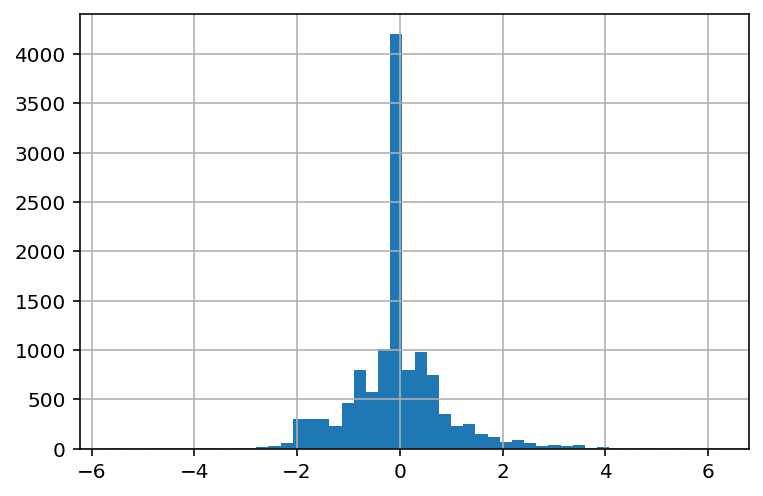

In [112]:
estimated_actual_ratio = np.log(ds.HoursEstimate / ds.HoursActual)
estimated_actual_ratio.hist(bins=50)

mean = np.mean(estimated_actual_ratio)
std = np.std(estimated_actual_ratio)
skew = stats.skew(estimated_actual_ratio)
kurtosis = stats.kurtosis(estimated_actual_ratio)
print(mean, std, skew, kurtosis)

In [113]:
HTML("Of log values standard deviation is <strong>%.02f</strong>" % std)

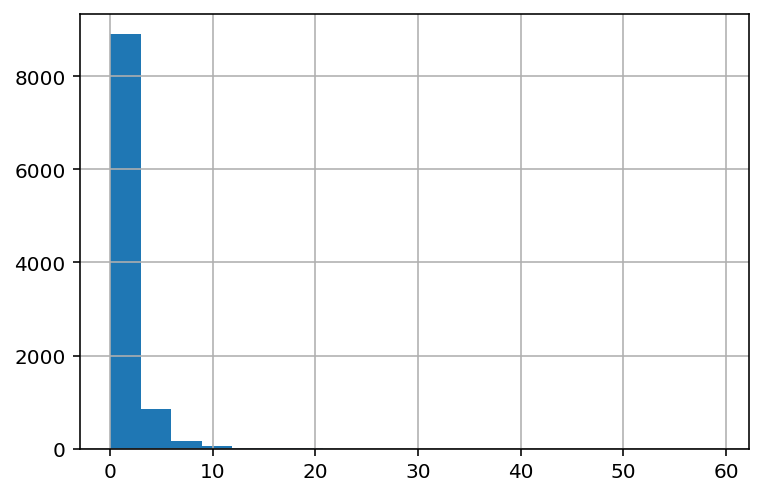

In [55]:
dd = pd.Series(np.random.lognormal(mean, std, size=100000))
numpy.random.lognormal

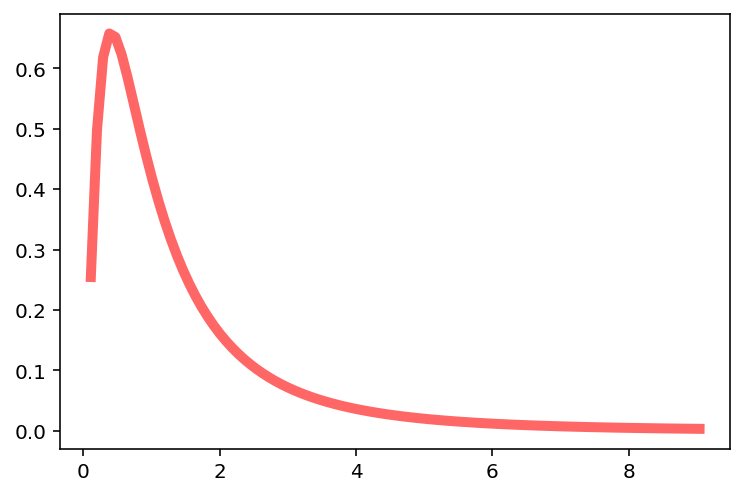

In [64]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.lognorm.ppf(0.01, std),
        stats.lognorm.ppf(0.99, std), 100)
ax.plot(x, stats.lognorm.pdf(x, std),
        'r-', lw=5, alpha=0.6, label='lognorm pdf')

In [90]:
s = np.random.lognormal(0, 1, 100000)
print(np.median(s), np.mean(s))

0.9994180825958505 1.6473471765878576
